In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [8]:
matrix = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(matrix)
eigenvalues, eigenvectors = np.linalg.eig(matrix)
print("Eigenvalues: ", eigenvalues)
print("Eigenvectors: \n", eigenvectors)


[[1 2 3]
 [4 5 6]
 [7 8 9]]
Eigenvalues:  [ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
Eigenvectors: 
 [[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]


In [9]:
for i in range(len(eigenvalues)):
    eigenvalue = eigenvalues[i]
    eigenvector = eigenvectors[:, i]
    # A * v і λ * v
    matrix_vector = np.dot(matrix, eigenvector)
    value_vector = eigenvalue * eigenvector
    if np.allclose(matrix_vector, value_vector):
        print(f"For eigenvalue {eigenvalue}: True")
    else:
        print(f"For eigenvalue {eigenvalue}: False")

For eigenvalue 16.116843969807043: True
For eigenvalue -1.1168439698070427: True
For eigenvalue -1.3036777264747022e-15: True


(1280, 960, 3)


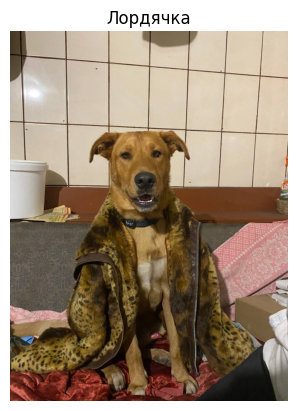

In [10]:
initial_image = imread("photo_2024-06-16_10-01-07.jpg")
print(initial_image.shape)

plt.imshow(initial_image)
plt.axis('off')
plt.title('Лордячка')
plt.show()

(1280, 960)
1.0


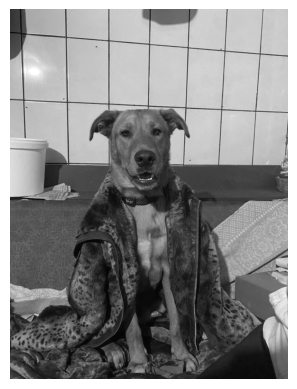

In [11]:
image_sum = initial_image.sum(axis=2)
print(image_sum.shape)
image_bw = image_sum/image_sum.max()
print(image_bw.max())
plt.imshow(image_bw, cmap='gray')
plt.axis('off')
plt.show()
